# Stochastic Two-Armed Bandit

Interact.Options{:ToggleButtons,Any}(Signal{Any}(true, nactions=0),"Fix",true,"probability",Interact.OptionDict(Any["probability","reward"],Dict{Any,Any}("reward"=>false,"probability"=>true)),Any[],Any[])

Interact.Options{:ToggleButtons,Any}(Signal{Any}([1], nactions=0),"RuleOut",[1],"None",Interact.OptionDict(Any["None","A-UCB","TS, TSM"],Dict{Any,Any}("None"=>[1],"A-UCB"=>[1,4],"TS, TSM"=>[1,5,6])),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),L"$p_1$",0.0,0.0:0.01:0.1,true)

Interact.Slider{Float64}(Signal{Float64}(-10.0, nactions=0),L"$\mu_1$",-10.0,-100.0:10.0:-10.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),L"$p_2$",0.0,0.0:0.01:0.1,true)

Interact.Slider{Float64}(Signal{Float64}(-10.0, nactions=0),L"$\mu_2$",-10.0,-100.0:10.0:-10.0,true)

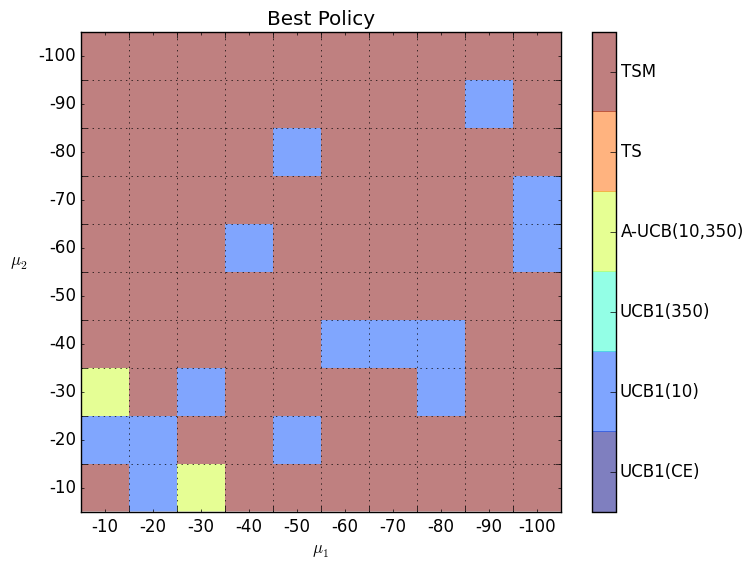

In [2]:
using Reactive, Interact
using DataStructures

include("plotPolicyMap.jl");

D = loadData("data.jld")

f = figure(facecolor = "white")
@manipulate for bFixProb = togglebuttons(OrderedDict{ASCIIString,Bool}("probability" => true, "reward" => false), label = "Fix"), ruleout = togglebuttons(OrderedDict{ASCIIString,Union{Vector{Int64},Void}}("None" => [1], "A-UCB" => [1, 4], "TS, TSM" => [1, 5, 6]), label = "RuleOut"), p1 = slider(0.:0.01:0.1, value = 0., label = L"$p_1$"), m1 = slider(-100.:10.:-10, value = -10., label = L"$\mu_1$"), p2 = slider(0.:0.01:0.1, value = 0., label = L"$p_2$"), m2 = slider(-100.:10.:-10, value = -10., label = L"$\mu_2$"); withfig(f) do
        plotPolicy(D, p1, m1, p2, m2, bFixProb = bFixProb, ruleout = ruleout, fig = f, bSave = false)
    end
end